In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.listdir('../input/home-credit-default-risk/'))

['installments_payments.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'bureau.csv', 'application_test.csv', 'application_train.csv', 'POS_CASH_balance.csv', 'sample_submission.csv', 'previous_application.csv']


### Data information(from the competition introduction)

- application_{train|test}.csv

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

- bureau.csv

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

- bureau_balance.csv

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

- POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

- credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

- previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

- installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

- HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.

In [3]:
app_train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')

### Bureau

In [4]:
bureau = pd.read_csv('../input/home-credit-default-risk/bureau.csv')
print('bureau.shape: {}'.format(bureau.shape))

bureau.shape: (1716428, 17)


In [5]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

#### SK_ID_CURR

In [7]:
bureau.SK_ID_CURR.nunique()

305811

Each client may got more than one bureau credit records in bureau table

#### SK_ID_BUREAU

In [8]:
bureau.SK_ID_BUREAU.nunique()

1716428

SK_ID_BUREAU uniquely identify each row in bureau table.

#### CREDIT_ACTIVE

In [9]:
bureau.CREDIT_ACTIVE.value_counts(dropna=False)

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [10]:
credit_active = bureau.groupby('SK_ID_CURR').CREDIT_ACTIVE.value_counts().unstack().fillna(0.0)
credit_active.columns = ['BUREAU_'+_.upper() for _ in credit_active.columns]
tmp = pd.merge(app_train, credit_active, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR').fillna(-1)

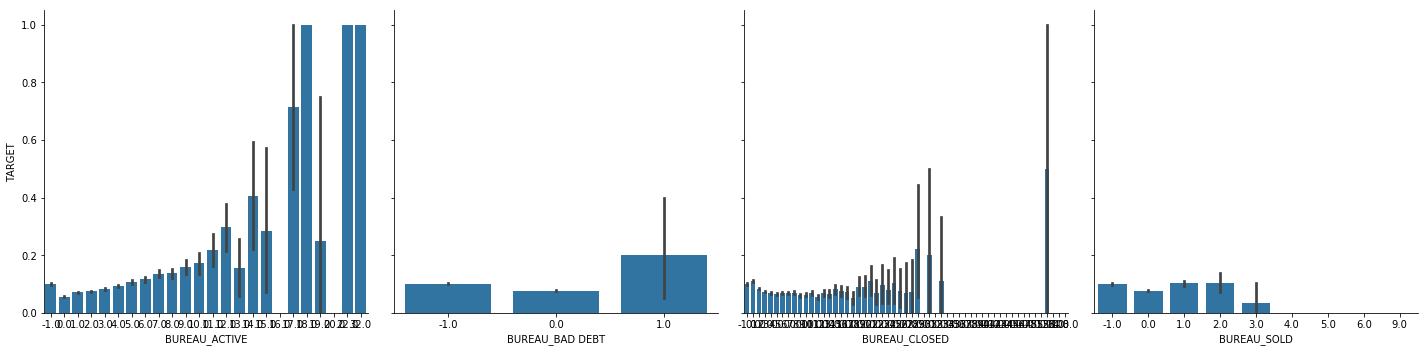

In [11]:
g = sns.PairGrid(tmp, x_vars=tmp.columns[-4:].values, y_vars=['TARGET'], height=5)
g.map(sns.barplot)

#### CREDIT_CURRENCY

In [12]:
bureau.CREDIT_CURRENCY.value_counts(dropna=False)

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

In [13]:
credit_currency = bureau.groupby('SK_ID_CURR').CREDIT_CURRENCY.value_counts().unstack().fillna(0.0)
credit_currency.columns = ['BUREAU_'+_.upper() for _ in credit_currency.columns]
tmp = pd.merge(app_train, credit_currency, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

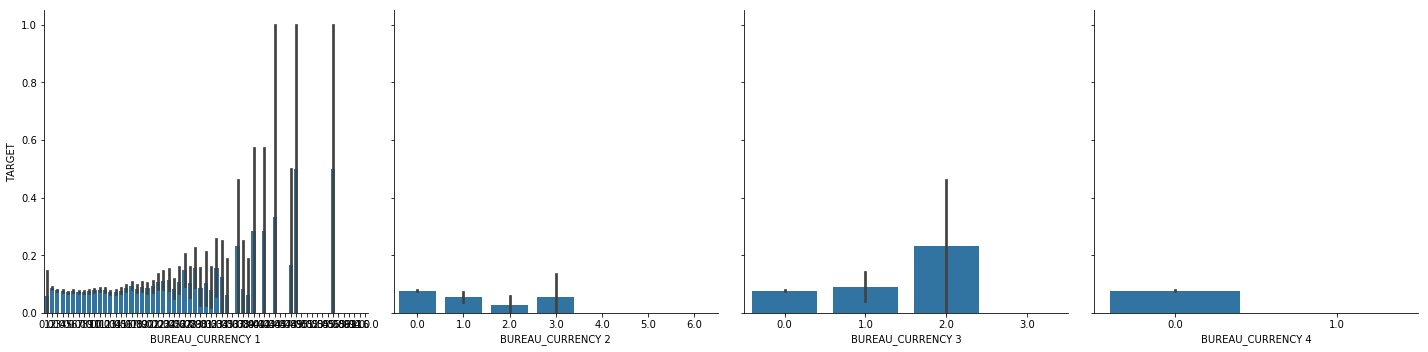

In [14]:
g = sns.PairGrid(tmp, x_vars=tmp.columns[-4:].values, y_vars=['TARGET'], height=5)
g.map(sns.barplot)

#### DAYS_CREDIT

In [15]:
bureau.DAYS_CREDIT.value_counts(dropna=False)

-364    1330
-336    1248
-273    1238
-357    1218
-343    1203
        ... 
-4       113
-3        74
-2        42
 0        25
-1        17
Name: DAYS_CREDIT, Length: 2923, dtype: int64

In [16]:
bureau.DAYS_CREDIT.describe()

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64

In [17]:
days_credit = bureau.groupby('SK_ID_CURR').DAYS_CREDIT.agg(['count', 'min', 'max'])
days_credit.columns = ['cnt_apply_credit', 'earliest_apply_credit_days', 'latest_apply_credit_days']
days_credit.columns = ['BUREAU_'+_.upper() for _ in days_credit.columns]
tmp = pd.merge(app_train, days_credit, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [18]:
tmp.isnull().sum()[-3:]

BUREAU_CNT_APPLY_CREDIT              44020
BUREAU_EARLIEST_APPLY_CREDIT_DAYS    44020
BUREAU_LATEST_APPLY_CREDIT_DAYS      44020
dtype: int64

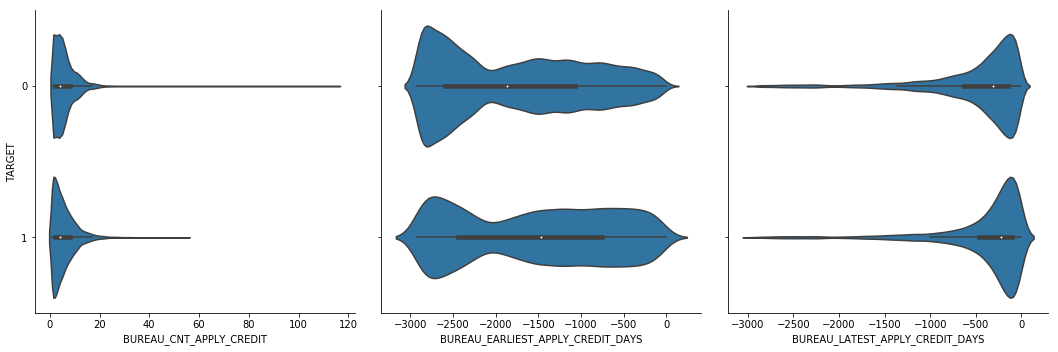

In [19]:
g = sns.PairGrid(tmp, x_vars=tmp.columns[-3:].values, y_vars=['TARGET'], height=5)
g.map(sns.violinplot, orient='h')

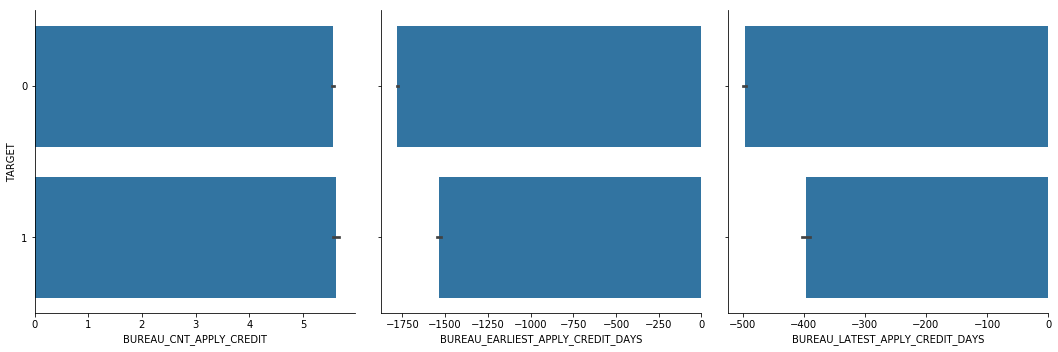

In [20]:
g = sns.PairGrid(tmp, x_vars=tmp.columns[-3:].values, y_vars=['TARGET'], height=5)
g.map(sns.barplot, orient='h')

#### CREDIT_DAY_OVERDUE

In [21]:
bureau.CREDIT_DAY_OVERDUE.value_counts(dropna=False)

0       1712211
30          311
60          126
13          103
8           103
         ...   
1548          1
1546          1
519           1
2565          1
372           1
Name: CREDIT_DAY_OVERDUE, Length: 942, dtype: int64

In [22]:
bureau.CREDIT_DAY_OVERDUE.isnull().sum()

0

In [23]:
bureau.groupby('SK_ID_CURR').CREDIT_DAY_OVERDUE.agg(['min', 'max']).head()

,min,max
SK_ID_CURR,,
100001,0,0
100002,0,0
100003,0,0
100004,0,0
100005,0,0


#### DAYS_CREDIT_ENDDATE

In [24]:
bureau.DAYS_CREDIT_ENDDATE.isnull().sum()

105553

In [25]:
bureau.DAYS_CREDIT_ENDDATE.describe()

count    1.610875e+06
mean     5.105174e+02
std      4.994220e+03
min     -4.206000e+04
25%     -1.138000e+03
50%     -3.300000e+02
75%      4.740000e+02
max      3.119900e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

#### DAYS_ENDDATE_FACT

In [26]:
bureau.DAYS_ENDDATE_FACT.isnull().sum()

633653

In [27]:
bureau.DAYS_ENDDATE_FACT.describe()

count    1.082775e+06
mean    -1.017437e+03
std      7.140106e+02
min     -4.202300e+04
25%     -1.489000e+03
50%     -8.970000e+02
75%     -4.250000e+02
max      0.000000e+00
Name: DAYS_ENDDATE_FACT, dtype: float64

#### AMT_CREDIT_MAX_OVERDUE

In [28]:
bureau.AMT_CREDIT_MAX_OVERDUE.isnull().sum()

1124488

In [29]:
bureau.AMT_CREDIT_MAX_OVERDUE.describe()

count    5.919400e+05
mean     3.825418e+03
std      2.060316e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.159872e+08
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64

In [30]:
bureau.groupby('SK_ID_CURR').AMT_CREDIT_MAX_OVERDUE.agg(['min', 'max', 'mean']).isnull().sum()

min     92840
max     92840
mean    92840
dtype: int64

#### CNT_CREDIT_PROLONG

In [31]:
bureau.CNT_CREDIT_PROLONG.isnull().sum()

0

In [32]:
bureau.CNT_CREDIT_PROLONG.value_counts()

0    1707314
1       7620
2       1222
3        191
4         54
5         21
9          2
6          2
8          1
7          1
Name: CNT_CREDIT_PROLONG, dtype: int64

In [33]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

#### CREDIT_TYPE

In [34]:
bureau.CREDIT_TYPE.value_counts(dropna=False)

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

#### AMT_ANNUITY

In [35]:
bureau.AMT_ANNUITY.describe()

count    4.896370e+05
mean     1.571276e+04
std      3.258269e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.350000e+04
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64

### Bureau_balance

In [36]:
bureau_balance = pd.read_csv('../input/home-credit-default-risk/bureau_balance.csv')

In [37]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [38]:
print('bureau.shape: {}'.format(bureau.shape))
print('bureau_balance.shape: {}'.format(bureau_balance.shape))

bureau.shape: (1716428, 17)
bureau_balance.shape: (27299925, 3)


In [39]:
bureau_balance.SK_ID_BUREAU.nunique()

817395

In [40]:
bureau.SK_ID_BUREAU.nunique()

1716428

In [41]:
bureau_balance.MONTHS_BALANCE.describe()

count    2.729992e+07
mean    -3.074169e+01
std      2.386451e+01
min     -9.600000e+01
25%     -4.600000e+01
50%     -2.500000e+01
75%     -1.100000e+01
max      0.000000e+00
Name: MONTHS_BALANCE, dtype: float64

In [42]:
bureau_balance.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

### POS_CASH_balance

In [43]:
pos_cash_balance = pd.read_csv('../input/home-credit-default-risk/POS_CASH_balance.csv')

In [44]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [45]:
pos_cash_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

### credit_card_balance

In [46]:
credit_card_balance = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')

In [47]:
credit_card_balance.shape

(3840312, 23)

In [48]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [49]:
credit_card_balance.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [50]:
credit_card_balance.dtypes

SK_ID_PREV                      int64
SK_ID_CURR                      int64
MONTHS_BALANCE                  int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL         int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT            int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS           object
SK_DPD                          int64
SK_DPD_DEF                      int64
dtype: object

### previous_application

In [51]:
previous_application = pd.read_csv('../input/home-credit-default-risk/previous_application.csv')

In [52]:
previous_application.shape

(1670214, 37)

In [53]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


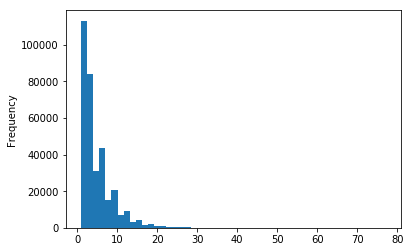

In [54]:
previous_application.groupby('SK_ID_CURR').SK_ID_CURR.count().plot(kind='hist', bins=50)

In [55]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

### installments_payments

In [56]:
installments_payments = pd.read_csv('../input/home-credit-default-risk/installments_payments.csv')

In [57]:
installments_payments.shape

(13605401, 8)

In [58]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
